In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
data = pd.read_csv('suv_data.csv')

In [3]:
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [5]:
print(data.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


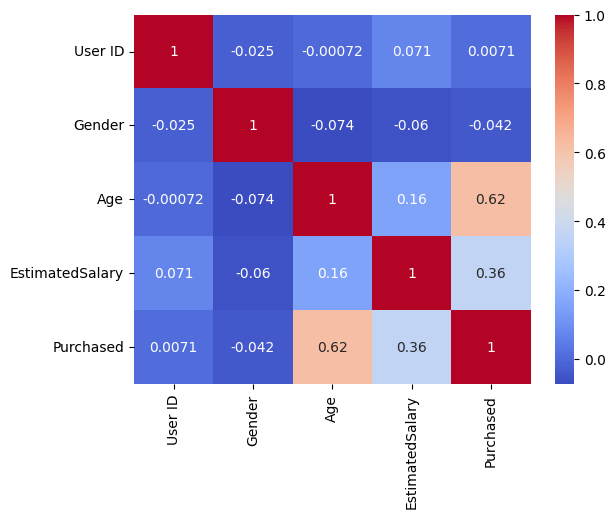

In [6]:
from sklearn.preprocessing import LabelEncoder
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data = pd.get_dummies(data, drop_first=True)
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# plt.show()

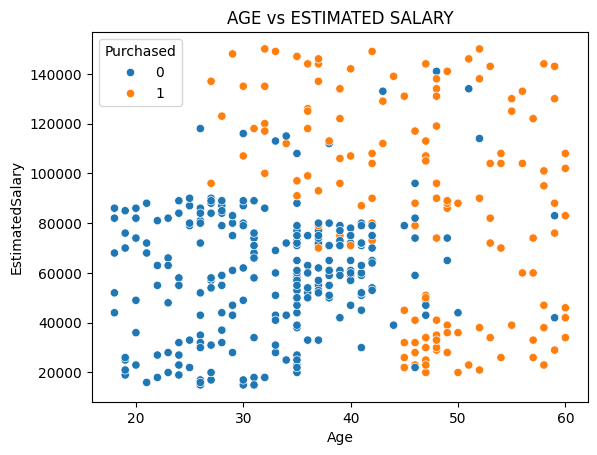

In [7]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data)
plt.title('AGE vs ESTIMATED SALARY')
plt.show()

## DATA PREPROCESSING

In [8]:
total_nulls = data.isnull().sum()
print(total_nulls)
total_nulls = data.isnull().sum().sum()
print(total_nulls)

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
0


In [10]:
X = data[['Age','EstimatedSalary']] # Features
y = data['Purchased'] #Target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Train the Logistic Regression Model 

In [14]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
print('Coefficients:',model.coef_)

Coefficients: [[1.97604783e-01 3.31255712e-05]]


In [17]:
print('Intercept:',model.intercept_)

Intercept: [-10.90633729]


## Evaluate The Model

In [18]:
y_pred = model.predict(X_test)

In [19]:
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  0.85


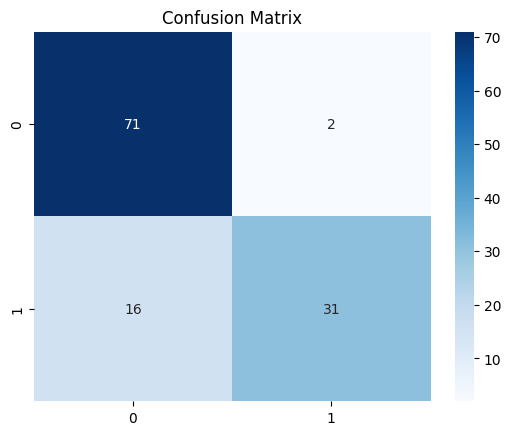

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        73
           1       0.94      0.66      0.78        47

    accuracy                           0.85       120
   macro avg       0.88      0.82      0.83       120
weighted avg       0.86      0.85      0.84       120



In [21]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report: ')
print(classification_report(y_test,y_pred))